In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.style.use('ggplot')
plt.rcParams['savefig.dpi'] = 300

Stat 226 Background survey. The aim of the background survey released this week was
to collect information regarding various characteristics of the students taking Stat 226 this
semester. Although the survey was sent to all students enrolled in the 9 Fall 2017 sections,
the data presented in the JMP file titled BackgroundSurveyData S226F17.JMP represent the
answers submitted by noon on Thursday, August 24-th. In this problem, you will be asked to
analyze parts of these data, and thus summarize information about your colleagues taking Stat
226 this semester.
Open the data in JMP.

Forget about JMP, it's only required to convert the data storage format from `.jmp` to `.csv`.

Pandas will be used instead!

First, read the survey results out from the csv file and store in the variable `sd`.

In [2]:
sd = pd.read_csv("SurveyData_S226F17.csv")

**a. How many students took the survey by noon on Thursday, August 24th?  Please be sure to report your answer as a number.**

The `.info` method from the sd DataFrame provides the answer in the `RangeIndex` section as an entry count.

In [3]:
num_observations = sd.info()
print(num_observations)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 15 columns):
Gender                        259 non-null object
Employment                    259 non-null object
First Generation Indicator    259 non-null object
New to Ames                   258 non-null object
Classification                259 non-null object
Favorite Restaurant           256 non-null object
Favorite Food Type            259 non-null object
# Caffeinated Drinks          259 non-null float64
Height (inches)               259 non-null object
Shoe size                     258 non-null float64
Length of Relationship        258 non-null object
Technology effects            258 non-null object
Age for Electronics           258 non-null float64
Football                      258 non-null object
Enthusiasm                    258 non-null object
dtypes: float64(3), object(12)
memory usage: 30.4+ KB
None


Or, the length of the DataFrame index works as well.

In [4]:
num_observations = len(sd.index)
print(num_observations)

259


In [5]:
print("So, the answer to part a is {} oberservations."
      .format(num_observations))

So, the answer to part a is 259 oberservations.


**b. How many variables did we collect data on? Please be sure to report your answer as a number.**

Pandas stores variables in columns, each column contains the data for every observation pertaining to the variable. 

If only there was a way to find out how many columns there were...

Right!  every DataFrame has a `columns` attribute.

In [6]:
num_variables = len(sd.columns)
print("So, the survey asked each student for info on {} variables."
     .format(num_variables))

So, the survey asked each student for info on 15 variables.


**(c) Free response submission. What is the population of interest?**

All 2017 Fall ISU students currently enrolled in the 9 STAT 226 sections.

**(d) Free response submission. What was the sample selected? Can this sample be considered representative of the entire population of interest? Explain.**

All students in the 9 sections of STAT 226 offered during the 2017 Fall school semester who submitted answers by noon on Thursday, August 24th.

The sample is represenative due to using data from all student submissions from the time period. If the sample excluded people who submitted at certain times of day or answered a question with a certain response, then it wouldn't be representative of the population.

**(e) Select all quantitative variables in this data set.**

In [7]:
qualitative = [x for x in sd.select_dtypes(include=[np.number]).columns]
print("The quanitative variables are \n {}".format(', '.join(qualitative)))

The quanitative variables are 
 # Caffeinated Drinks, Shoe size, Age for Electronics


Hey, shouldn't `Length of Relalationship` be numeric as well?

hmm, time to investigate

In [8]:
print("data type of Length of Relationship is:", sd["Length of Relationship"].dtypes)

data type of Length of Relationship is: object


Pandas makes a column data type an object whenever it contains mixed types such as numbers and text.

Now, how to locate the problematic mixed type data?

In [9]:
col_to_convert = ["Height (inches)", "Length of Relationship"]
for col in col_to_convert:
    sd[col] = [''.join(re.findall("\d*\.?\d+", str(item))) for item in sd[col]]

Here's a breakdown of what's happening.

First, the variables that should be numeric are put into a list to later loop over.

Then, for every value in a column, numeric numbers are identified and stored in a new list.
That list then replaces the old column data.

In [10]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>


### Breakdown of the regex \d*\.?\d+

**tldr**: match floats, ints, or decimals.

| Symbol | meaning |
|------- | :-----|
| * | find 0 or more occurances of the preceding expression |
| ? | find 0 or 1 occurances of the preceding expression |
| + | find 1 or more occurances of the preceding expression |
| \d | find any digit |

\d* = Find 0 or more digits 

\\.? = 0 or 1 ".". The "\" escapes the normal meaning of "." in re and treats it as a regular character.

\d+ = One or more digits

In [11]:
sd["Length of Relationship"] = pd.to_numeric(sd["Length of Relationship"])
sd["Height (inches)"] = pd.to_numeric(sd["Height (inches)"])

Okay, what are the numeric data types now.

In [12]:
qualitative = [x for x in sd.select_dtypes(include=[np.number]).columns]
print("The quanitative variables are \n{}".format('\n'.join(qualitative)))

The quanitative variables are 
# Caffeinated Drinks
Height (inches)
Shoe size
Length of Relationship
Age for Electronics


**f. Free response submission. Create a bar chart that displays gender. Export this graph
as .png or .jpeg and upload in Blackboard (following the same instructions as in problem
(3d)). Based on the survey data, what proportion of students are female?**

In [13]:
sd["Gender"] = sd["Gender"].astype("category")

In [14]:
print(sd["Gender"].cat.categories)

Index(['female', 'male'], dtype='object')


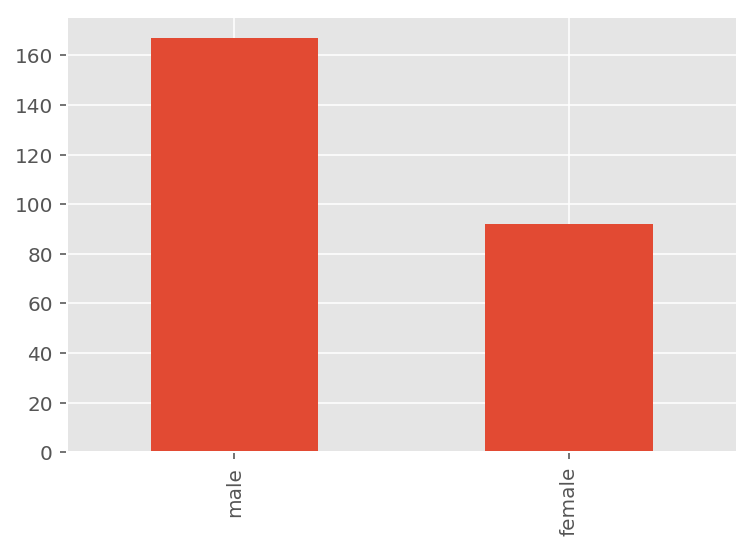

In [15]:
gender_comp = sd["Gender"].value_counts().plot(kind='bar')
plt.savefig("gender.png")
plt.show(gender_comp)

In [16]:
gender_dist = sd["Gender"].value_counts(normalize=True)
cumul_total = 0
for code, gender in enumerate(sd["Gender"].cat.categories):
    cumul_total += gender_dist[code] * 100
    print("{}: {}%".format(gender, gender_dist[code] * 100))
print("total: {}".format(cumul_total))


female: 35.521235521235525%
male: 64.47876447876449%
total: 100.00000000000001


Well, that's almost right. Since the calculations are done using floats there's only so many decimal digits to go around.  Similar to the problem with base 10.  

What's 1/3 + 1/3 + 1/3there's a risk of having the total not equal exactly 100%.

How can a 100% total be ensured?

In [17]:
print("{:.2%} are female.".format(gender_dist["female"]))

35.52% are female.


**(g) Is the value calculated in part (4f) a parameter or a statistic?**

A statistic

**(h) Create a chart that displays part-time versus full-time status. (You do NOT need to upload
this chart.) How many students are part-time and/or working students? Please be sure to
report your answer as a number.**

Convert the "Employment" variable to be of type "category"

Then, the 'value_counts' method gets the counts for each category. 

The 'plot' method of the DataFrame is told to plot as a bar chart.

The figure is saved, and then shown.

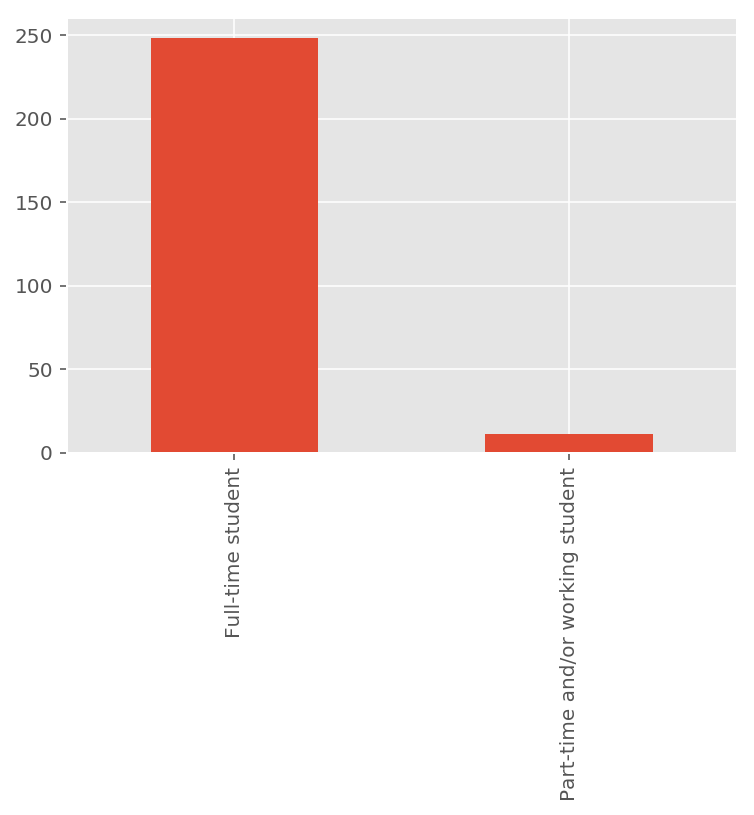

In [18]:
sd["Employment"] = sd["Employment"].astype("category")
student_status = sd["Employment"].value_counts().plot(kind='bar')
plt.savefig("student_status.png")
plt.show(student_status)

In [19]:
print("{} are part-time and/or working students."
      .format((sd["Employment"] == "Part-time and/or working student").sum()))

11 are part-time and/or working students.


**i. Look at the proportion of “Technology effects” separately
by gender. To do this, simply add both variables under the Categories, X, Levels tab
when creating a bar chart. Please notice that the order in which you specify variables
makes a difference in how you report/interpret your answers. Export this graph as .png or
.jpeg and upload it in Blackboard.**

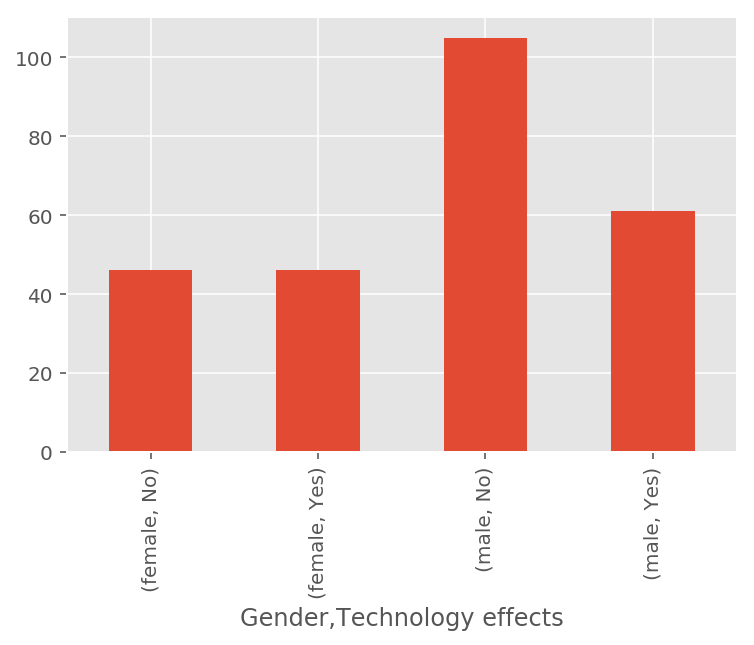

In [20]:
gender_tech_effects = sd.groupby(["Gender"])
graph_gender_tech_effects = gender_tech_effects["Technology effects"].value_counts().plot(kind="bar")
plt.savefig("gender_tech_effects.png", bbox_inches='tight')
plt.show(graph_gender_tech_effects)